<div style="background-image: url( https://cdn.pixabay.com/photo/2016/11/30/20/58/programming-1873854_1280.png ); height: 200px; width: 100%; border: 1px solid black;   background-size: cover; color:white;">
    
<br>
<br>
    
<h1 style="text-align:center;"> Regresión Logística: Predicción de Enfermedad Coronaria</h1>

<br>



&emsp;<b>Integrante 1:</b> Ariadna De Ávila - 201712782
<br>
&emsp;<b>Integrante 2:</b> Felipe Pulido - 201716831
<br>
&emsp;<b>Tarea:</b> 2
<br>
<br>
</div>

# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
from random import randint
%matplotlib inline

In [2]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

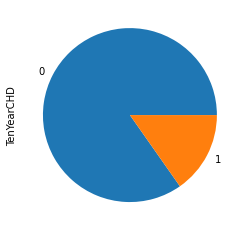

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [5]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)

In [6]:
scaler = MinMaxScaler() # Utilice un MinMaxScaler #
x_train = scaler.fit_transform(x_train)# Ajuste y Aplique el Escalamiento (función fit_transform) #
x_test = scaler.transform(x_test)# Aplique el Escalamiento (función transform) #

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [7]:
logreg =  LogisticRegression() # Modelo de Regresión Logística #
logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #
print(f'Precisión inicial: {accuracy_score(y_test, y_pred)}')

Precisión inicial: 0.844


#### Conclusión
Debido a que se desea maximizar la presición, es decir de todos los casos predecidos positivos cuántos de verdad eran positivos. Esta es una presición inicial alta, por consecuencia, es una buena aproximación para el modelo.

### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

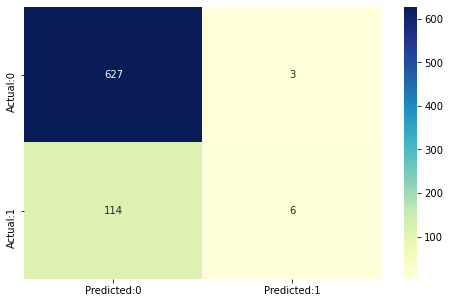

In [8]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [9]:
from sklearn.preprocessing import binarize

umbrales = [i/10 for i in range(1,11)]  # Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)[:,1].reshape(-1, 1)# Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold= umbral)# Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2)
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos positivos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[306 324]
 [ 18 102]]
Con 408 predicciones correctas y 18 falsos positivos.
Sensitividad: 0.85 Especificidad: 0.4857

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[512 118]
 [ 63  57]]
Con 569 predicciones correctas y 63 falsos positivos.
Sensitividad: 0.475 Especificidad: 0.8127

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[583  47]
 [ 94  26]]
Con 609 predicciones correctas y 94 falsos positivos.
Sensitividad: 0.2167 Especificidad: 0.9254

->Para un umbral de 0.4 tenemos esta matriz de confusión:
[[612  18]
 [104  16]]
Con 628 predicciones correctas y 104 falsos positivos.
Sensitividad: 0.1333 Especificidad: 0.9714

->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[627   3]
 [114   6]]
Con 633 predicciones correctas y 114 falsos positivos.
Sensitividad: 0.05 Especificidad: 0.9952

->Para un umbral de 0.6 tenemos esta matriz de confusión:
[[629   1]
 [119   1]]
Con 630 predicciones correc

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

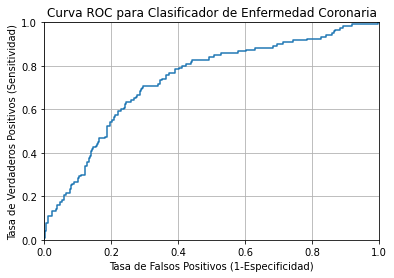

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

### Análisis
Si la sensibilidad es alta significa que el modelo es bueno prediciendo que las personas tendrán riesgo de padecer enfermedad coronaria cuando de verdad tenga el riesgo. Por otro lado, si esta está baja implicaría que la tasa de acertar cuando si poseen el riesgo es baja, por lo cual, a las personas que tienen riesgo se marcarán como si no.

De forma similar, si la especificidad es alta significa que la tasa de acertar cuando no padecen riesgo es alta, por lo cual, el modelo sería buneo identificando las personas que no poseen riesgo de manera correcta. Por otro lado, si esta es baja, el modelo clasificaría una persona que no tiene riesgo como que sí lo posee. 

En este caso, es preferible, tener mayor sensitividad. Debido a que es más grave clasificar a una persona que posee riesgo incorrectamente que viceversa. Esto debido a que si se califica mal a una persona sin riesgo, esta se cuidará. Por el contrario, una persona con riesgo clasificada erróneamente podría no cuidarse y al final padecer enfermedad coronaria.

Basados en este análisis, entonces se escoge el modelo con un umbral de 0.1.


## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

------------------------- Con una tasa de: 0.5 -------------------------


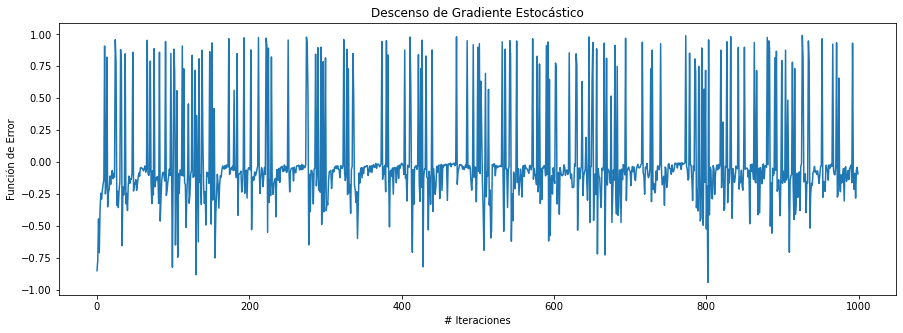

Precisión modelo actual: 0.84
------------------------- Con una tasa de: 1.0 -------------------------


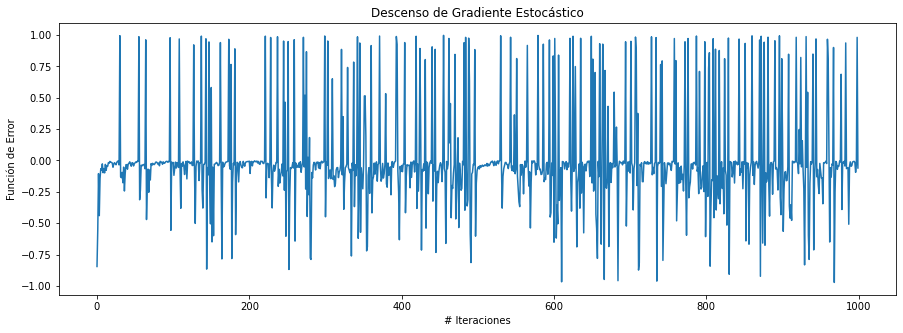

Precisión modelo actual: 0.8106666666666666
------------------------- Con una tasa de: 1.5 -------------------------


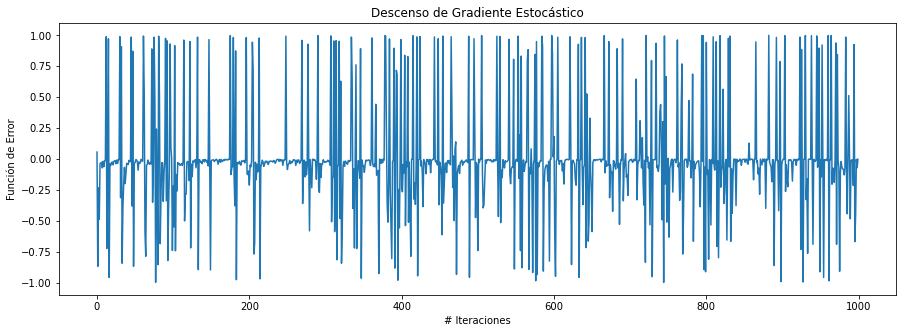

Precisión modelo actual: 0.8373333333333334
------------------------- Con una tasa de: 2.0 -------------------------


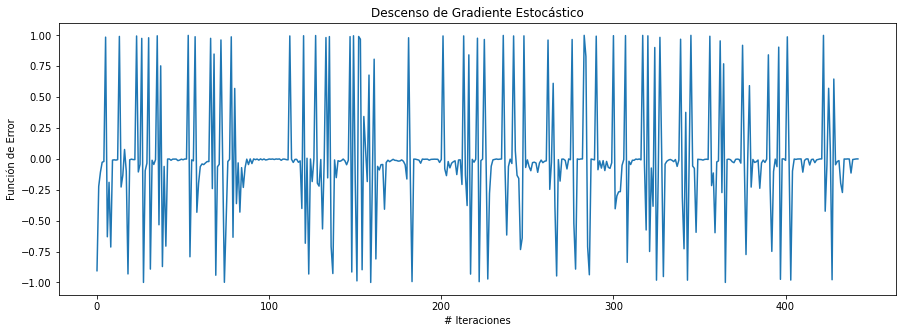

Precisión modelo actual: 0.8186666666666667
------------------------- Con una tasa de: 2.5 -------------------------


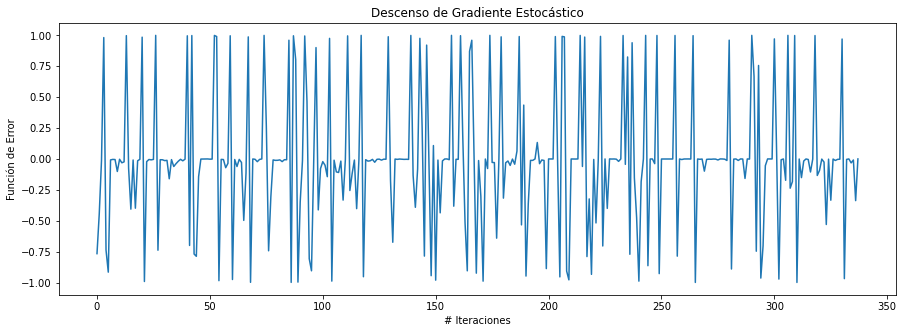

Precisión modelo actual: 0.84
------------------------- Con una tasa de: 3.0 -------------------------


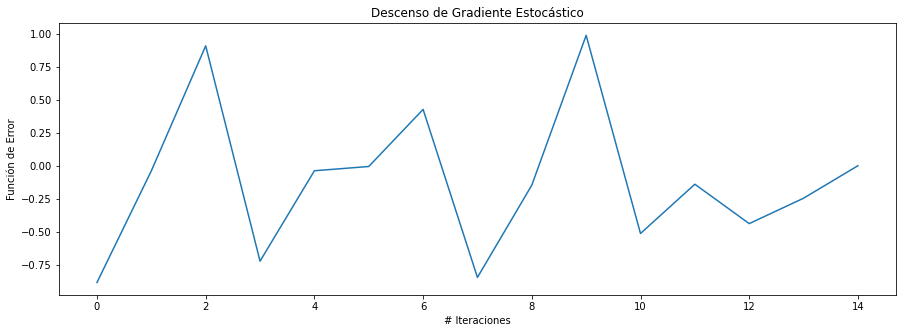

Precisión modelo actual: 0.8346666666666667
------------------------- Con una tasa de: 3.5 -------------------------


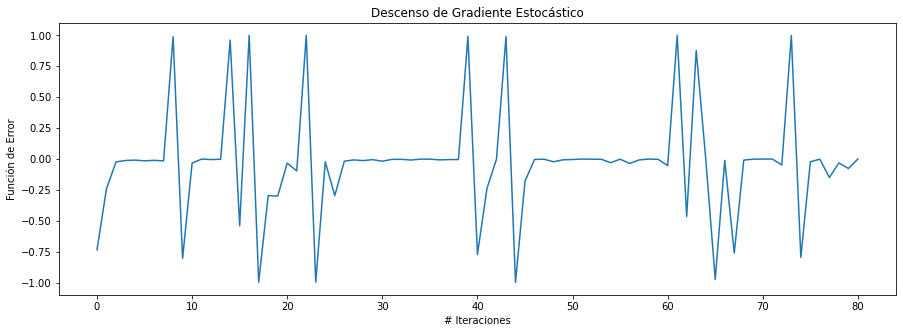

Precisión modelo actual: 0.84
------------------------- Con una tasa de: 4.0 -------------------------


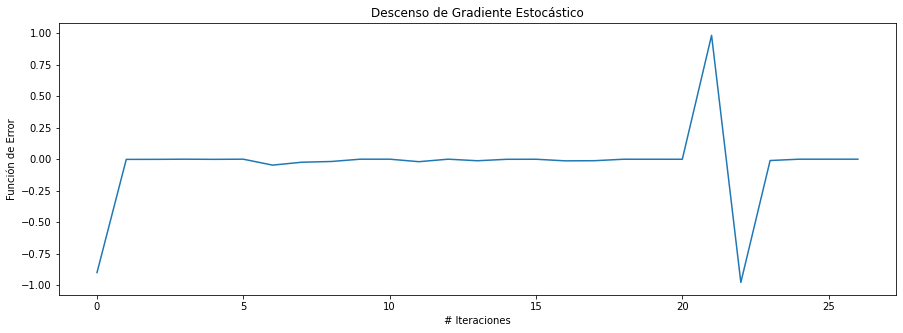

Precisión modelo actual: 0.84
------------------------- Con una tasa de: 4.5 -------------------------


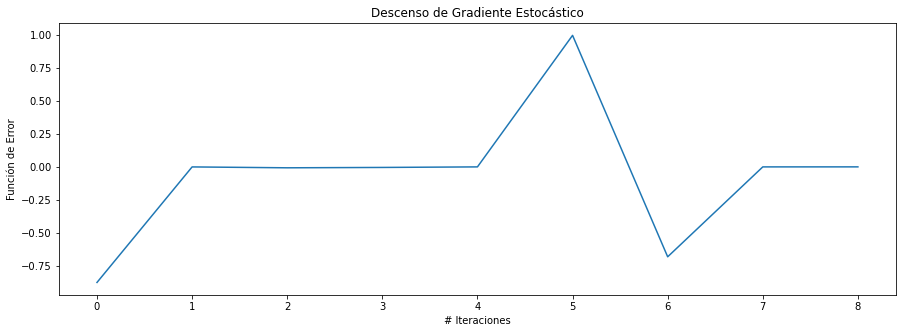

Precisión modelo actual: 0.84
------------------------- Con una tasa de: 5.0 -------------------------


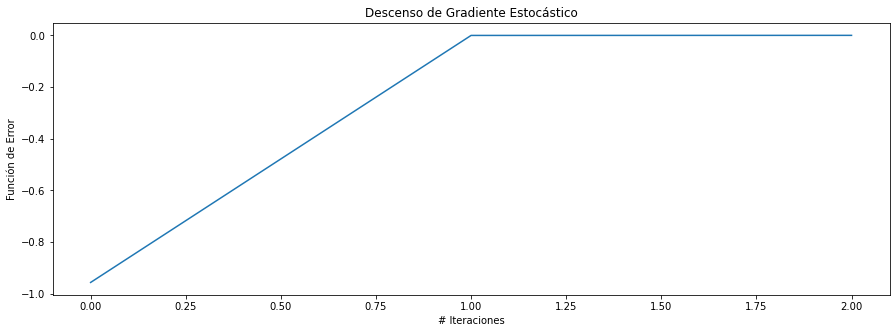

Precisión modelo actual: 0.84


In [11]:
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.shape[0]), x_train]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión 
# y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100

def sigma(w,x):
    multi = np.dot(np.transpose(w),x)
    res_sigmoid = 1 / (1 + np.exp(-multi))# Salida de la función sigmoide #
    return res_sigmoid

tasas = [0.5*i for i in range(1,11)]# Defina un vector que contenga las tasas que desea probar #
modelo = {} #Guarda los y predecidos. llave: la tasa valor: y_preds
for tasa in tasas:
    print(f"------------------------- Con una tasa de: {tasa} -------------------------")
    #Resetear valores
    j = 0
    w = w0.copy()
    error = 100
    errores = []
    
    while abs(error) > eps and j < 1000:
        # # Desarrollo de algoritmo # #
        
        #Escoger par aleatorio
        i = randint(0,X_train_array.shape[0]-1) # Posición aleatoria #
        xActual = X_train_array[i]
        yActual = y_train_array[i]
        
        #Calcular g y el error, añadir el error
        g = sigma(w,xActual)
        error = yActual - g
        errores.append(error)
        
        #Actualizar el w
        w = w + tasa*error*xActual
        
        #Avanzar j
        j += 1
      
    #Graficar el progreso del error
    plt.figure(figsize=(15,5))
    plt.plot(errores)
    plt.xlabel('# Iteraciones')
    plt.ylabel('Función de Error')
    plt.title('Descenso de Gradiente Estocástico')
    plt.show()
    
    X_test_array = np.c_[np.ones(x_test.shape[0]), x_test]
    y_test_array = y_test.values

    y_pred = np.zeros(len(x_test))

    for i in range(0,len(x_test)):
        prob = sigma(w,X_test_array[i])
        if prob>0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
            
    #Añadir a los modelos
    modelo[tasa] = y_pred
    
    print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

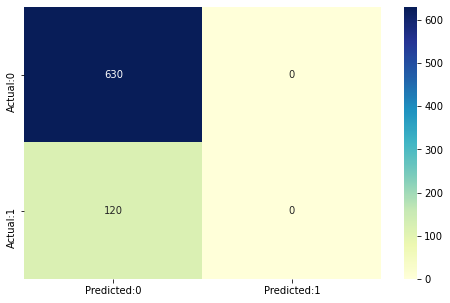

In [13]:
y_pred = modelo[0.5]
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Análisis

En Este modelo se posee un erro tipo I nulo y por otro lado, el error tipo II es bastante alto, demostrando una vez más el desbalance del modelo. El modelo cuenta con una presición de 0.84, la cual, es bastante alta. Por otro lado, tenemos una especificidad de 1 y una sensibilidad de 0. Basados en el análisis anterior, sabemos que se desea maximizar esta última, para lo cual, este modelo no funciona. Además, este pareciera estar clasificando todos los datos como negativos y debido al desbalance de los datos, esta 'metodología' puede funcionar. Sin embargo, no es la finalidad de nuestro modelo.
Por otro lado, el método utilizado, de descenso de gradiente estocástico es muy subjetivo a los datos que se seleccionen además de la tasa. 